In [1]:
import tensorflow as tf
print (tf.__version__)

2.10.0


In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
model = tf.keras.Sequential(layers=[
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation="softmax")    
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile (optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [5]:
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 839us/step - loss: 2.5032 - accuracy: 0.7605
Epoch 2/5
1875/1875 [==============================] - 2s 813us/step - loss: 0.5860 - accuracy: 0.8448
Epoch 3/5
1875/1875 [==============================] - 2s 813us/step - loss: 0.4825 - accuracy: 0.8717
Epoch 4/5
1875/1875 [==============================] - 2s 804us/step - loss: 0.4198 - accuracy: 0.8891
Epoch 5/5
1875/1875 [==============================] - 2s 801us/step - loss: 0.4005 - accuracy: 0.8958


In [6]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print ("\n 테스트 정확도:", test_acc)

313/313 - 0s - loss: 0.3194 - accuracy: 0.9322 - 273ms/epoch - 871us/step

 테스트 정확도: 0.932200014591217


313/313 [==============================] - 0s 601us/step
예측값:7, 실제값: 7


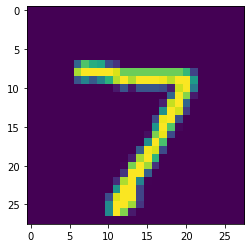

In [7]:
import matplotlib.pyplot as plt
import numpy as np 
predictions = model.predict(X_test)
pred = np.argmax(predictions[0])

print("예측값:{}, 실제값: {}".format(pred, y_test[0]))

plt.imshow(X_test[0])
plt.show()

In [8]:
history.history

{'loss': [2.503220558166504,
  0.5859877467155457,
  0.48248815536499023,
  0.41978782415390015,
  0.40052342414855957],
 'accuracy': [0.7605000138282776,
  0.8447666764259338,
  0.8716999888420105,
  0.8890666961669922,
  0.8957833051681519]}

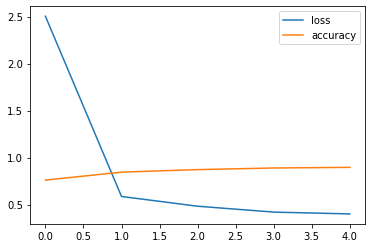

In [9]:
plt.plot(history.history["loss"])
plt.plot(history.history["accuracy"])
plt.legend(["loss", "accuracy"])
plt.show()